# Self Study 1

This self study sheet contains some code, and some questions. You should first walk through the code, and then work on the questions. The questions can be answered by extending this notebook with some additional code and text ("markdown") cells. A brief guide to formatting in markdown cells is here:<br>
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed<br>


The following just gives us some tools we'll need

In [49]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from scipy.stats import multivariate_normal as mvn


KNN: With K=1, the boundaries are similar to higher values, but within the blue region, there is a small green region as a consequence of only looking at
the point itself. For higher values, there is almost no difference between increasing K, and the boundaries are almost identical. This indicates that the 
region are not overfit, and probably fit the model well.

Linear regression classifier: It is not able to properly seperate the classes (especially blue and green), presumably because these two classes are not 
far enough away from each other. 

Other feautures: may provide better or worse seperation between classes. 

The other two classifiers are as good as KNN here. 

**Exercise 2:** Divide the data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

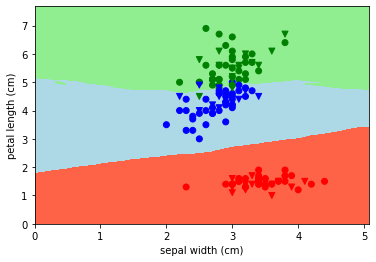

In [58]:
maxval1 = np.max(irisdata.data_test[:,feat1])
maxval2 = np.max(irisdata.data_test[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

# Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = maxpos(Z)

# Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z

# Z = irislinsvc.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z


meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data_training[:,feat1],irisdata.data_training[:,feat2],c=irisdata.target_training, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.scatter(irisdata.data_test[:,feat1],irisdata.data_test[:,feat2],c=irisdata.target_test, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']), marker="v")
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

In [59]:
data_training, data_test, target_training, target_test = sklearn.model_selection.train_test_split(irisdata.data, irisdata.target, test_size=0.30, train_size=0.70, random_state=None, shuffle=True, stratify=None)

print(len(data_training), len(data_test))
print(len(target_training), len(target_test))

irisdata.data_training = data_training
irisdata.data_test = data_test
irisdata.target_training = target_training
irisdata.target_test = target_test

105 45
105 45


Finally, we revisit Exercise 2 from the first exercise sheet. We construct a dataset that is linearly separable, but may invite overfitting:

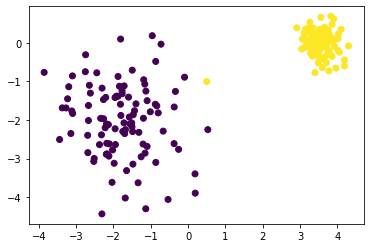

In [62]:
gauss1= mvn(mean=(-2,-2),cov=((1,0),(0,1))).rvs(random_state=1,size=100)
gauss2= mvn(mean=(3.5,0),cov=((0.1,0),(0,0.1))).rvs(random_state=1,size=100)
X=np.vstack([gauss1,gauss2])
X=np.vstack([X,(0.5,-1)])
Y=np.hstack([np.zeros(100),np.ones(101)])

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

**Exercise 4**: What classifiers can you construct that appear to overfit by classifying the yellow outlier point as belonging to the yellow class? What other classifiers classify this point as purple?

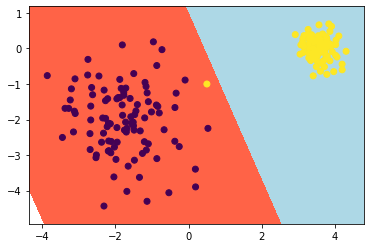

In [64]:
# linsvc = SVC(kernel='linear')
# linsvc.fit(X,Y)
# Z = linsvc.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z

linreg = LinearRegression()
linreg.fit(X,Y)
Z = linreg.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = Z

# logreg = LogisticRegression()
# logreg.fit(X,Y)
# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z

# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X,Y)
# Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = Z


meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.5,0.5,1.5,2.5],colors=('tomato','lightblue'))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()